
Analyse de l'évolution de l'inflation

## Introduction

L'inflation est un indicateur économique central qui mesure la hausse durable et géneralisé des prix des biens et services dans une économie.
Ces dernières années, la question de l'inflation est devenue un enjeu majeur pour les ménages, les entreprises ainsi que les décideurs publics.
L'objectif de ce projet est d'analyser l'évolution de l'inflation dans le temps à l'aide de Python, en utilisant des statistiques descriptives et des visualisations simples afin d'en retirer une interpretation économique.


### Présentation des données

Les données utilisées dans ce projet représentent l'évolution du taux d'inflation sur plusieurs années.
Chaque observation correspond à une période donnée (année ou mois), associée à un taux d'inflation exprimé en pourcentage. Ces données permettent d'analyser les tendances de l'inflation dans le temps et d'identifier des phases de hausse,de stabilité ainsi que de baisse.
 

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("data/valeurs_mensuelles.csv", sep=";")
df.head()


,Libellé,Indice des prix à la consommation - Base 2015 - Glissement annuel - Ensemble des ménages - France - Ensemble y compris loyers fictifs,Codes
0,idBank,001768589,NaN
1,Dernière mise à jour,15/01/2026 08:45,NaN
2,Période,NaN,NaN
3,2025-12,1.0,A
4,2025-11,1.1,A


In [3]:
# 1) On part du tableau CSV déjà chargé : df
df_clean = df.copy()

# 2) On renomme les colonnes utiles :
# - "Libellé" devient "periode"
# - la 2e colonne (celle avec les valeurs) devient "inflation"
df_clean = df_clean.rename(columns={"Libellé": "periode", df.columns[1]: "inflation"})

# 3) On garde uniquement les lignes où la période ressemble à "YYYY-MM"
df_clean["periode"] = df_clean["periode"].astype(str)
df_clean = df_clean[df_clean["periode"].str.contains("-", na=False)]

# 4) On transforme "YYYY-MM" en vraie date (on met le jour 01)
df_clean["date"] = pd.to_datetime(df_clean["periode"] + "-01", errors="coerce")

# 5) On transforme l’inflation en nombre
df_clean["inflation"] = pd.to_numeric(df_clean["inflation"], errors="coerce")

# 6) On garde seulement ce qu’on veut + on supprime les lignes vides + on trie
df_clean = df_clean[["date", "inflation"]].dropna().sort_values("date")

# Vérification
df_clean.head()


,date,inflation
422,1991-01-01,3.4
421,1991-02-01,3.5
420,1991-03-01,3.5
419,1991-04-01,3.2
418,1991-05-01,3.4


In [5]:
df_clean.tail()


,date,inflation
7,2025-08-01,1.1
6,2025-09-01,1.3
5,2025-10-01,1.1
4,2025-11-01,1.1
3,2025-12-01,1.0


In [8]:
df_clean.describe()


,date,inflation
count,420,420.000000
mean,2008-06-16 02:03:25.714285824,1.709048
min,1991-01-01 00:00:00,-0.300000
25%,1999-09-23 12:00:00,1.000000
50%,2008-06-16 00:00:00,1.700000
75%,2017-03-08 18:00:00,2.200000
max,2025-12-01 00:00:00,5.700000
std,NaN,1.075287


### Analyse descriptive du taux d’inflation

Le tableau contient 420 observations mensuelles du taux d’inflation, couvrant la période de janvier 1991 à décembre 2025.

Le taux d’inflation moyen sur l’ensemble de la période est d’environ 1,7 %, avec une médiane également proche de 1,7 %, ce qui indique une distribution relativement équilibrée autour de cette valeur.

Les valeurs observées varient entre un minimum de -0,3 %, correspondant à des épisodes de déflation, et un maximum de 5,7 %, montrant une période de forte tension inflationniste.

La dispersion du taux d’inflation, mesurée par un écart-type d’environ 1,1, montre que l’inflation a connu des variations notables au cours du temps, avec une hausse plus importante  sur ces dernières années.





In [11]:
import matplotlib.pyplot as plt


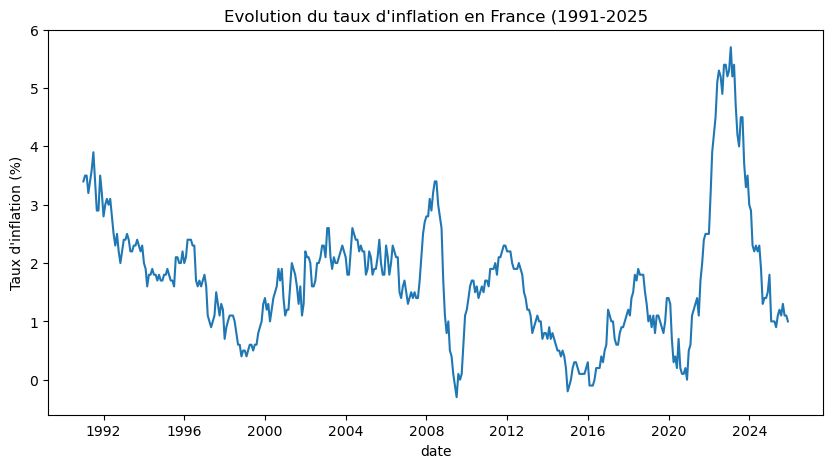

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df_clean["date"], df_clean["inflation"])
plt.xlabel("date")
plt.ylabel("Taux d'inflation (%)")
plt.title("Evolution du taux d'inflation en France (1991-2025")
plt.show()



### Analyse graphique de l'évolution de l'inflation

Le graphique met en évidence une inflation globalement modérée entre les années 1990 et la fin des années 2010, avec des fluctuations régulières autour de niveaux proches de 1 à 2 %.

Autour des années 2000, on observe une baisse progressive de l’inflation. Cette période correspond à un contexte économique relativement stable en Europe, marqué par une croissance modérée et une inflation maîtrisée, notamment dans le cadre de la mise en place de l’euro et de politiques monétaires orientées vers la stabilité des prix.

Une chute plus marquée apparaît autour de 2008–2009. Cette période correspond à la crise financière mondiale des subprimes, qui a entraîné un fort ralentissement de l’activité économique, une baisse de la consommation et une diminution des pressions inflationnistes.

À partir de 2020, une nouvelle rupture apparaît dans la dynamique de l’inflation. Cette période correspond à la crise sanitaire liée au Covid-19, marquée par des perturbations économiques importantes (ralentissement de l’activité, difficultés d’approvisionnement, mesures de soutien public).

Entre 2021 et 2022, le taux d’inflation augmente fortement, atteignant un pic en 2022. Cette hausse peut s’expliquer notamment par la reprise économique post-Covid, la hausse des prix de l’énergie et les tensions sur certaines chaînes de production.

À partir de 2023, on observe un recul progressif de l’inflation, indiquant un retour vers une situation plus stable, sans toutefois retrouver immédiatement les niveaux observés avant la crise.


## Conclusion

Cette analyse met en évidence l’évolution du taux d’inflation en France sur la période 1991–2025, à partir de données mensuelles issues de l’INSEE.  
L’étude montre que l’inflation reste globalement modérée sur le long terme, tout en connaissant des variations marquées lors de certains événements économiques majeurs.

Les crises économiques et sanitaires, comme la crise financière de 2008 ou la crise du Covid-19, apparaissent clairement dans les données, avec des ruptures visibles dans la dynamique de l’inflation.  
La forte hausse observée en 2022, suivie d’un ralentissement progressif, illustre l’impact de ces chocs sur l’économie française.

Ce projet montre l’intérêt de l’analyse de données temporelles pour comprendre l’évolution de phénomènes économiques et met en évidence l’utilité des outils Python pour explorer, nettoyer et visualiser des données réelles.
